## Declaração do Problema

A Unicorn Investors quer fazer um investimento em um novo meio de transporte - JetRail. JetRail usa a tecnologia de propulsão Jet para operar trilhos e mover pessoas em alta velocidade! O investimento só faria sentido, se eles pudessem obter mais de 1 milhão de usuários mensais nos próximos 18 meses. Para ajudar a Unicorn Ventures em sua decisão, você precisa prever o tráfego na JetRail para os próximos 7 meses. Você recebe dados de tráfego do JetRail desde o início no arquivo de teste.


### Gerando as Hipóteses

A variavel dependente é a quantidade de passageiros no **JetRail**

- Haverá um aumento no tráfego com o passar dos anos.

    - Tendência geral é de aumento com o passar do tempo.

- O tráfego será intenso de maio a outubro.
    
    - As visitas turísticas geralmente aumentam durante esse período.

- O tráfego durante a semana será maior do que nos fins de semana/feriados.
    
    - Tendencia é de maior trafego empresarial nos dias da semana.

- O tráfego durante os horários de pico será alto.
    
    - Provavelmente seja para viajar, trabalhar ou faculdade.


Agora vamos validar essas hipóteses com base no conjunto de dados.


## Carregando os dados

In [88]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go# Offline mode

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Load dataset

In [18]:
df_train = pd.read_csv('data/Train_SU63ISt.csv')
df_test = pd.read_csv('data/Test_0qrQsBZ.csv')

## Análise exploratoria de dados

In [6]:
# verificando as colunas 
df_test.columns, df_train.columns

(Index(['ID', 'Datetime'], dtype='object'),
 Index(['ID', 'Datetime', 'Count'], dtype='object'))

In [7]:
# verificando os tipos de dados
df_test.dtypes, df_train.dtypes

(ID           int64
 Datetime    object
 dtype: object,
 ID           int64
 Datetime    object
 Count        int64
 dtype: object)

In [8]:
# verificando as dimenções das bases de dados
df_train.shape, df_test.shape

((18288, 3), (5112, 2))

Temos **18.288** registros no conjunto de dados de treinamento e **5.112** para o conjunto de teste. Essa divisão equivale a **28%** dos dados para realização do teste.  

## Extração de Features

Extraindo data e hora de Datatime, convertendo de objeto para datatime. 

In [23]:
df_train['Datetime'] =  pd.to_datetime(df_train.Datetime, format='%d-%m-%Y %H:%M')
df_test['Datetime'] =  pd.to_datetime(df_test.Datetime, format='%d-%m-%Y %H:%M')


Criamos algumas hipóteses sobre o efeito da hora, dia, mês e ano na quantidade de passageiros, para isso vamos extrair esses dados da **Datetime**.

In [28]:

for i in (df_train, df_test):
    i['Year'] = i.Datetime.dt.year
    i['Month'] = i.Datetime.dt.month
    i['Day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [31]:
df_train.head()

,ID,Datetime,Count,Year,Month,Day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [43]:
# criando variavel Dias da semana 

df_train['Day_Week'] = df_train.Datetime.dt.dayofweek

In [111]:
# Binarizando os dados para representar se o dia é de semana ou fim de semana. Se for 0 é fim de semana, se for 1 é dia de semana.
df_train['weekend'] = df_train['Day_Week'].between(5, 6, inclusive=True).astype(int)

In [91]:
# visualizando os resultados 

df_temp = df_train
df_temp.index = df_train.Datetime # Alterando o index para o Datetime no eixo x. 
df = df_train.drop('ID', 1) # Removendo variável ID, para obter apenas o Datetie no eixo x.
ts = df['Count']

data = go.Scatter(x=ts.index, y=ts.values)
layout = go.Layout(height=600, width=800, title='Serie temporal', xaxis=dict(title='Tempo (Ano - Mês)'),
                   yaxis=dict(title='Quantidade de Passsageiros'))
fig = go.Figure(data=[data], layout=layout)
fig.show()

Com este gráfico, podemos inferir que há uma tendência de aumento na série, ou seja, o número de passageiros está aumentando com o passar do tempo.data

Também podemos ver que em certos periodos a um aumento repentino no trafego. A possível razão para esses dias, seja algum evento ou feriado que aconteceu. 

## Análise Exploratoria

Validando hipóteses

### Primeira hipótese - O tráfego aumentaria com o passar dos anos.

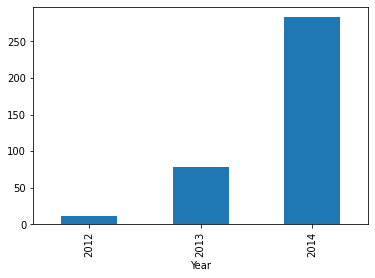

In [94]:
df_train.groupby('Year')['Count'].mean().plot.bar();

Podemos notar um crescimento exponencial do tráfego em relação ao ano, o que valida nossa hipótese.

### Segunda hipótese - Haverá aumento no tráfego de maio a outubro

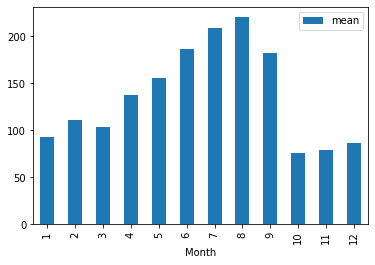

In [99]:
df_train.groupby('Month')['Count'].agg({'mean'}).plot.bar();

Aqui, vemos uma diminuição na média de passageiros nos últimos três meses. Isso não parece certo. Vamos ver a média mensal de cada ano separadamente.

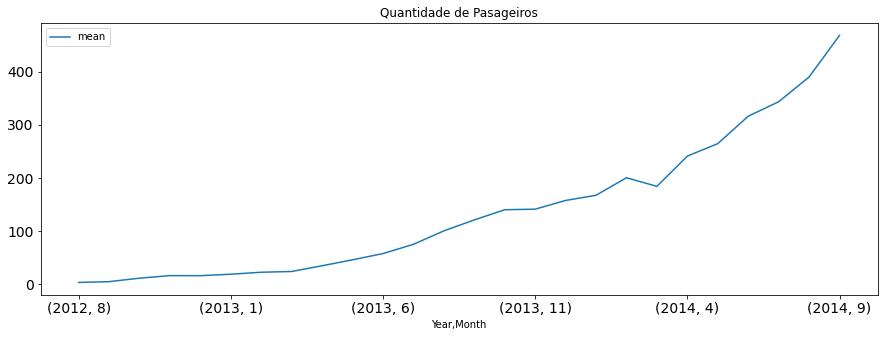

In [101]:
fig = df_train.groupby(['Year', 'Month'])['Count'].agg({'mean'})
fig.plot(figsize=(15, 5), title='Quantidade de Pasageiros', fontsize=14);

In [ ]:
Podemos observar que os meses 10, 11 e 12 do ano de 2014 não estão presentes e o valor médio para esses meses no ano de 2012 é bem menor.

Como há uma tendência de aumento na série temporal, o valor médio para o restante dos meses será maior devido ao maior número de passageiros no ano de 2014 e obteremos um valor menor para esses últimos 3 meses.

No gráfico de linha acima, ha uma tendência de aumento mensal de passageiros e o crescimento é aproximadamente exponencial.

Para confirmar, Veremos a média diária de passageiros.

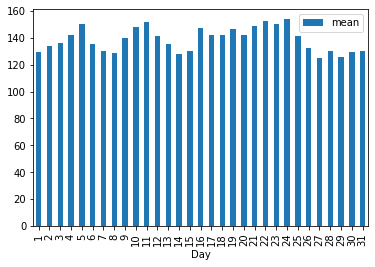

In [102]:
df_train.groupby('Day')["Count"].agg({'mean'}).plot.bar();

 ### Terceira hipótese - O tráfego será maior durante os horários de pico. 

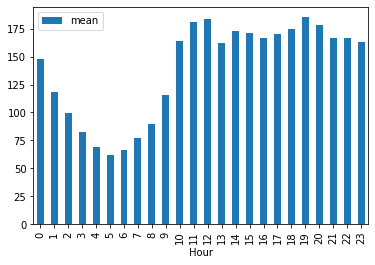

In [104]:
df_train.groupby('Hour')['Count'].agg({'mean'}).plot.bar();

Observado o gráfico, pode-se inferir que o pico do tráfego ocorre às 19 horas, e em seguida, vemos uma tendência decrescente até as 5 horas.

Depois disso, a quantidade de passageiros começa a aumentar novamente e atinge o pico novamente entre 11h e 12h.

### Quarta hipótese - O tráfego será maior durante a semana.

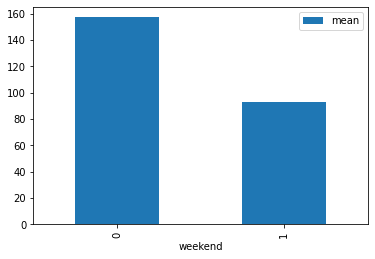

In [115]:
df_train.groupby('weekend')['Count'].agg({'mean'}).plot.bar();

Podemos observar que existem menos dias de semana (1) e mais dias comerciais (0)

In [116]:
df_train.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

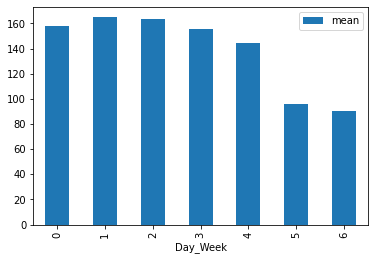

In [124]:
# Quantidade de passageiros durante o dia
df_train.groupby('Day_Week')['Count'].agg({'mean'}).plot.bar();

Com esse gráfico de barra, podemos inferir que a contagem de passageiros é menor no sábado e no domingo, em comparação com os outros dias da semana.

## Limpeza de dados

In [133]:
# Removendo a variável ID e Datetime duplicada
df_train.drop(columns=['ID', 'Datetime'], axis=1, inplace=True)

A série da hipótese três apresentou muito ruído no horário, agora vamos agregar a série em horas, diárias, semanais e mensais para reduzir o ruído e torná-lo mais estável e, portanto, será mais fácil para o modelo aprender.

In [137]:
# Serie temporal de horários
hourly = df_train.resample('H').mean()

# Serie temporal diaria
daily = df_train.resample('D').mean()

# Serie temporal semanal
weekly = df_train.resample('W').mean()

# Serie temporal mensal
monthly = df_train.resample('M').mean()

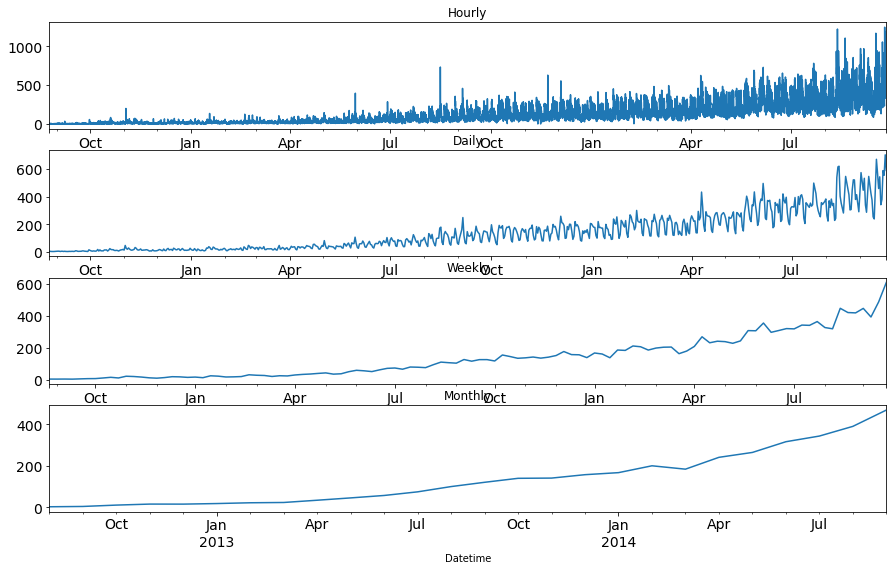

In [139]:
# Verificando com gráficos
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,9), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,9), title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,9), title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,9), title='Monthly', fontsize=14, ax=axs[3])
plt.show()

In [ ]:
Podemos ver que a série temporal está se tornando cada vez mais estável quando a agregamos em uma base diária, semanal e mensal.

Mas seria difícil converter as previsões mensais e semanais em previsões horárias, pois primeiro temos que converter as previsões mensais em previsões semanais, semanais em diárias e diárias em horas, o que se tornará um processo muito expandido. Portanto, vou usar séries temporais diárias.

In [153]:
# dataset previões diárias de treinamento
df_train_daily = daily

# dataset previões diárias de testes
df_test.index = df_test.Datetime
df_test.drop(columns=['ID', 'Datetime'], axis=1, inplace=True)
df_test_daily = df_test.resample('D').mean()


## Tecnicas de modelagem e evolução do modelo